### Clustering Algorithm with first three variables of "wine" dataset

As it is difficult to visualize clusters with 13 variables, I am considering only the first three variables here(Alcohol, Malic acid, Ash) and implementing K-means on that.

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wines = pd.read_csv("data/wine.csv")
wines.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
wines.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [16]:
wine = wines.drop('Wine', axis=1)

In [17]:
wine.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [18]:
wine.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
wine.drop(['Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth',
           'Color.int', 'Hue', 'OD', 'Proline'], axis=1, inplace=True)

In [20]:
wine.columns

Index(['Alcohol', 'Malic.acid', 'Ash'], dtype='object')

In [21]:
wine.head()

,Alcohol,Malic.acid,Ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87


## k-Means Clustering

### Elbow method to find the optimal number of clusters
As we can see in the below plot, the elbow is located at k = 4, which suggests that k = 4 is a good choice for this 'wine' dataset

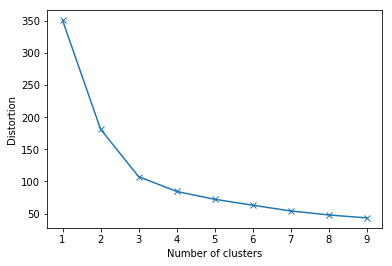

In [22]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm

distortions = []

for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(wine)
    distortions.append(km.inertia_)
    
plt.plot(range(1,10), distortions, marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [23]:
from sklearn.cluster import KMeans
from sklearn import metrics

# K Means Cluster (n=3)
model3 = KMeans(n_clusters=4)
model3.fit(wine)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
model3.labels_

array([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 1, 1, 3, 3, 3, 2, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3,
       3, 3, 3, 2, 2, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 2, 2, 2, 3, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 3, 0, 0, 2, 1, 1, 2,
       2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0])

Running predict on the training set returns the same as labels_

In [25]:
y_pred = model3.predict(wine)
print(y_pred)
print(len(y_pred))

[1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 1 1 1
 3 3 3 2 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3 2 3 3 2 3 3 3 3 2
 2 2 3 3 3 3 3 2 2 3 3 0 0 0 3 3 3 3 0 3 2 2 2 3 2 0 0 0 2 2 2 2 0 2 2 0 0
 2 0 2 2 1 2 3 0 0 2 1 1 2 2 2 2 1 0 0 2 1 0 2 2 1 0 0 0 2 0]
178


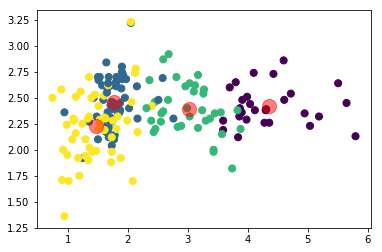

In [26]:
plt.scatter(wine.iloc[:, 1], wine.iloc[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model3.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.5)

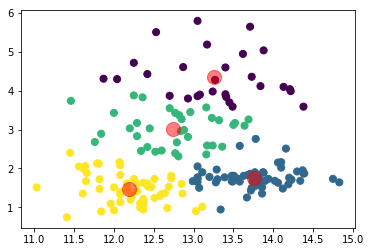

In [27]:
plt.scatter(wine.iloc[:, 0], wine.iloc[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

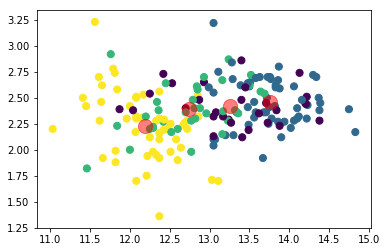

In [28]:
plt.scatter(wine.iloc[:, 0], wine.iloc[:, 2], c=y_pred, s=50, cmap='viridis')

centers = model3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=200, alpha=0.5)

We don't have clusters defined before hand in real world, but in this data we already know the clusters. So I compared the obtained clusters with the known classifications.

In [29]:
pd.crosstab(y_pred, wines.Wine)

Wine,1,2,3
row_0,,,
0,6,6,16
1,49,5,6
2,3,10,23
3,1,50,3


<IPython.core.display.Javascript object>


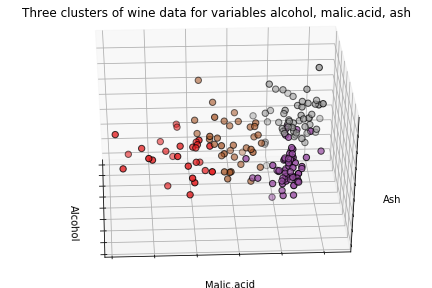

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=110)
#ax = fig.gca(projection='3d')

ax.scatter(wine.iloc[:, 0], wine.iloc[:, 1], wine.iloc[:, 2], c=y_pred, cmap=plt.cm.Set1, edgecolor='k', s=40)


ax.set_title("Three clusters of wine data for variables alcohol, malic.acid, ash")
ax.set_xlabel("Alcohol")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Malic.acid")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Ash")
ax.w_zaxis.set_ticklabels([])

plt.show()

### References

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html<br>
https://archive.ics.uci.edu/ml/datasets/wine<br>
http://www.shichaoji.com/2017/02/16/unsupervised-learning-1/<br>
http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html